In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 8.3MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=be2e5e1073d6495b115f8fb3dc355e4f98f2d4dfd95c146601f8a96ae80f7f72
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"charvibannurs","key":"0084b95f8bab27fe33aa7e6cf39ef44c"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d sanikamal/rock-paper-scissors-dataset

 98% 441M/452M [00:03<00:00, 146MB/s]
100% 452M/452M [00:03<00:00, 143MB/s]


In [ ]:
! unzip rock-paper-scissors-dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper04-118.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper04-119.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-000.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-001.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-002.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-003.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-004.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-005.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-006.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-007.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-008.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-009.png  
  inflating: dataset/Rock-Paper-Scissors/train/paper/paper05-010.png  
  inflating: dataset/Rock-

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [34]:
training_path = "/content/dataset/Rock-Paper-Scissors/train"
test_path = "/content/dataset/Rock-Paper-Scissors/test"

In [35]:
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range=5,
    horizontal_flip=True,
    vertical_flip=True,
)

In [36]:
train_dataset_aug = dataGen.flow_from_directory(
    training_path,
    target_size = (200,200),
    batch_size = 32,
    shuffle=True,
    seed = 865
)

Found 2520 images belonging to 3 classes.


In [37]:
test_dataset_aug = dataGen.flow_from_directory(
    test_path,
    target_size = (200,200),
    batch_size = 32,
    shuffle=True,
    seed = 865
)

Found 372 images belonging to 3 classes.


# Using Pretrained model (MobileNet)

In [38]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [39]:
pretrained_model.trainable = False

In [40]:
pretrained_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [41]:
model = tf.keras.models.Sequential()

In [42]:
model.add(pretrained_model)

In [45]:
model.add(tf.keras.layers.GlobalAveragePooling2D())

In [46]:
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

#Compile
model.compile(optimizer = 'adam',
                loss='categorical_crossentropy',metrics = ['accuracy'])

In [47]:
history = model.fit(train_dataset_aug, validation_data=test_dataset_aug, epochs = 5)

Epoch 1/5
79/79 [==============================] - 33s 387ms/step - loss: 0.9663 - accuracy: 0.5230 - val_loss: 0.5900 - val_accuracy: 0.6989
Epoch 2/5
79/79 [==============================] - 29s 368ms/step - loss: 0.3206 - accuracy: 0.9549 - val_loss: 0.4144 - val_accuracy: 0.8898
Epoch 3/5
79/79 [==============================] - 29s 371ms/step - loss: 0.0385 - accuracy: 0.9932 - val_loss: 0.4605 - val_accuracy: 0.8844
Epoch 4/5
79/79 [==============================] - 29s 368ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.6417 - val_accuracy: 0.8414
Epoch 5/5
79/79 [==============================] - 29s 369ms/step - loss: 0.0356 - accuracy: 0.9920 - val_loss: 0.1191 - val_accuracy: 0.9651


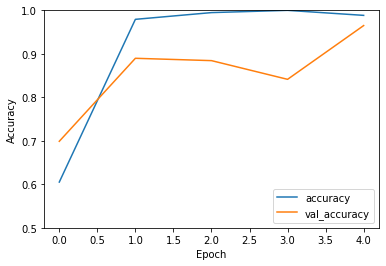

In [48]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

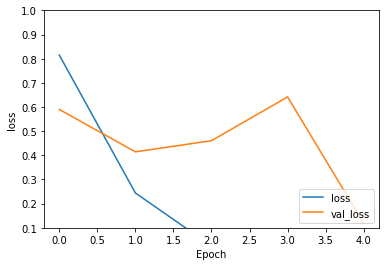

In [50]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

In [51]:
model.evaluate(test_dataset_aug)

12/12 [==============================] - 4s 308ms/step - loss: 0.1146 - accuracy: 0.9651


[0.11463896185159683, 0.9650537371635437]

In [69]:
test_dataset = dataGen.flow_from_directory(test_path, target_size=(200,200),
                                          class_mode='categorical', batch_size=32)
x_batches, y_batches= next(test_dataset)


Found 372 images belonging to 3 classes.


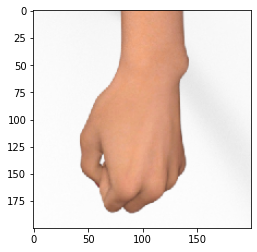

In [71]:
image = x_batches[9]
plt.imshow(image)
plt.show()

In [72]:
predicted=model.predict(test_dataset_aug)
output=np.argmax(predicted[9])
if output==0:
  print("paper")
elif output==1:
  print("rock")
else:
  print("scissors")

rock


In [74]:
model.save('Pretrained_model.h5')